In this notebook, I will try to show the procceses I've done on the titanic dataset to predict final survival status.  The submission file in the end of this session has 0.78708 accuracy rate and placed to top 5.79% !(Currently 1,609th place out of 27,800)

Now lets begin with importing the neccesary libraries!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the data & Data Cleaning

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

The test dataset doesn't have the 'Survived' column since we will predict those values with model trained on training data set.

In [4]:
submission_example = pd.read_csv('gender_submission.csv')
submission_example.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

This is what our final submission to competition will look like! Lets make ready the our submission data frame before moving on the data proccesing!

In [5]:
submission = pd.DataFrame()
submission['PassengerId'] = test_data['PassengerId']

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We have total 10 column in our dataset with descriptions given bellow.


***survival*** 	Survival 	0 = No, 1 = Yes

***pclass*** 	    Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

***sex*** 	    Sex 	

***Age*** 	    Age in years 	

***sibsp*** 	    # of siblings / spouses aboard the Titanic 	

***parch*** 	    # of parents / children aboard the Titanic 	

***ticket*** 	    Ticket number 	

***fare*** 	    Passenger fare 	

***cabin*** 	    Cabin number 	

***embarked*** 	Port of Embarkation

Looks like we only have few categorical variables in our dataset, this will make our job easier since its continous values are valuable for ML models. Now lets have a quick look at our central tendencies!

In [8]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [9]:
test_data.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

According to the pivot table train and test datasets have a equal distribution on numerical columns. 

# Data proccesing

*** Missing values ***

In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

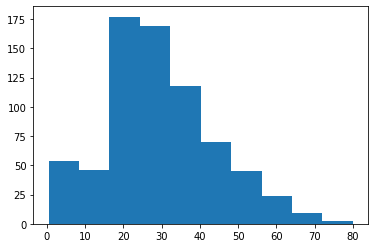

In [12]:
plt.hist(train_data['Age'])
plt.show()

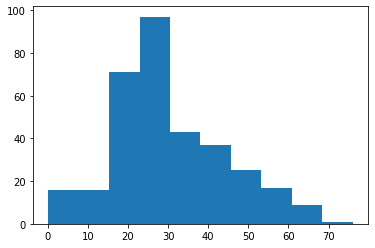

In [13]:
plt.hist(test_data['Age'])
plt.show()

It appears like our age is close enough to normal distribution and since we don't have many null values we can replace the null values with mean.

In [14]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [15]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [16]:
test_data['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

Since like the cabin feature has too many different and null values, I will drop this column to avoid curse of dimensionality.

In [17]:
train_data.drop(['Cabin'], axis = 1, inplace = True)
test_data.drop(['Cabin'], axis = 1, inplace = True)


# Explorary data analysis & Feature Scaling

*** Feature: PassengerId ***

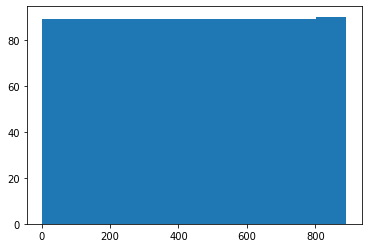

In [18]:
plt.hist(train_data['PassengerId'])
plt.show()

In [19]:
train_data['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

Our PassengerId is a unique value assigned to every passenger, we can drop this column since it will have 0 effect on our predictions.

In [20]:
train_data.drop(['PassengerId'], axis = 1, inplace = True)
test_data.drop(['PassengerId'], axis = 1, inplace = True)

*** Feature: Survived ***

<AxesSubplot:xlabel='Survived', ylabel='count'>

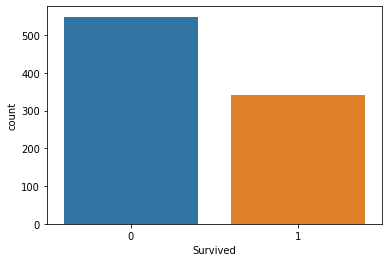

In [21]:
sns.countplot(train_data['Survived'])

*** Feature: PClass ***

<AxesSubplot:xlabel='Pclass', ylabel='count'>

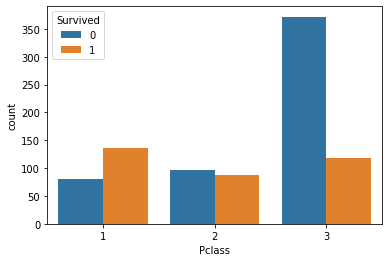

In [22]:
sns.countplot(x = "Pclass", hue = "Survived", data = train_data)

Looks like most of the first class passengers survived meanwhile majority of the third class passengers didn't

*** Feature: Name ***

In [23]:
train_data['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [24]:
train_data.drop(['Name'], axis = 1, inplace = True)
test_data.drop(['Name'], axis = 1, inplace = True)

*** Feature: Sex ***

<AxesSubplot:xlabel='Sex', ylabel='count'>

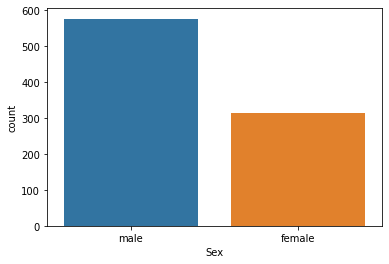

In [25]:
sns.countplot(train_data['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

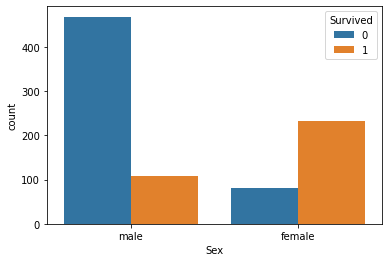

In [26]:
sns.countplot(x = "Sex", hue = "Survived", data = train_data)

Again, the sex column has a similar situation with the class column in here majority of the women survived but men did not.

*** Feature: Age ***

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

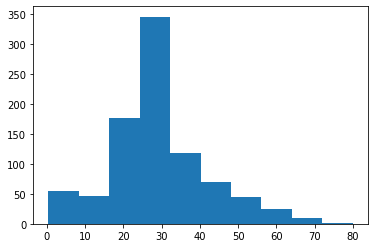

In [27]:
plt.hist(train_data['Age'])

(array([ 16.,  16.,  71., 183.,  43.,  37.,  25.,  17.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

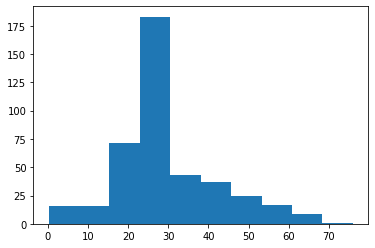

In [28]:
plt.hist(test_data['Age'])

*** Feature: SibSp ***

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

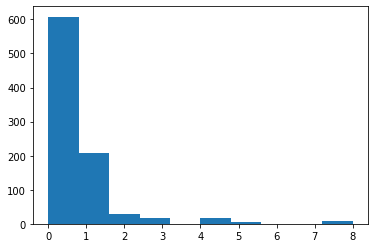

In [29]:
plt.hist(train_data['SibSp'])

(array([283., 110.,  14.,   4.,   0.,   4.,   1.,   0.,   0.,   2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

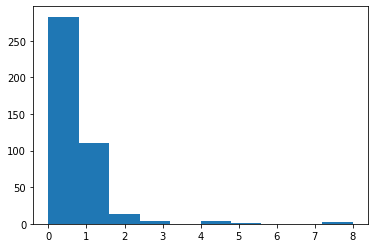

In [30]:
plt.hist(test_data['SibSp'])

*** Feature: Parch ***

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

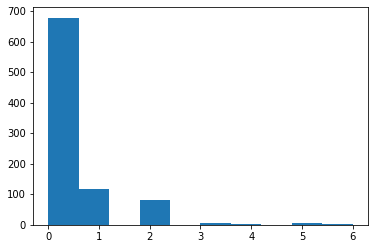

In [31]:
plt.hist(train_data['Parch'])

(array([324.,  52.,  33.,   3.,   2.,   1.,   1.,   0.,   0.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

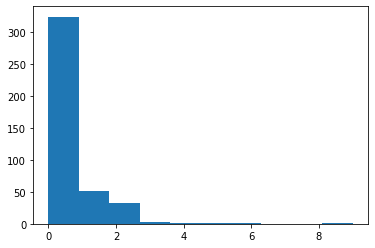

In [32]:
plt.hist(test_data['Parch'])

*** Feature: Ticket ***

In [33]:
train_data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [34]:
train_data.drop(['Ticket'], axis = 1, inplace = True)
test_data.drop(['Ticket'], axis = 1, inplace = True)

*** Feature: Fare ***

In [35]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [36]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

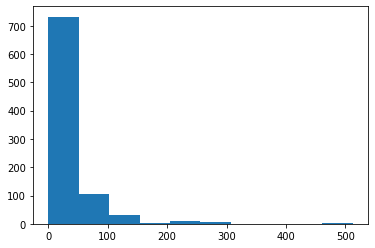

In [37]:
plt.hist(train_data['Fare'])
plt.show()

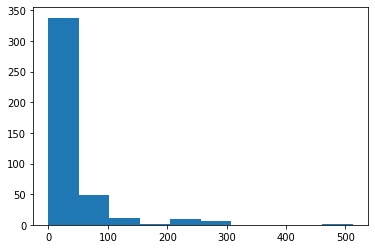

In [38]:
plt.hist(test_data['Fare'])
plt.show()

Since the Fare feature has a exponential distribution we can maybe with this issue with square root transformatio.

In [39]:
train_data['Fare'] = train_data['Fare'] ** (1 / 3)
test_data['Fare'] = test_data['Fare'] ** (1 / 3)

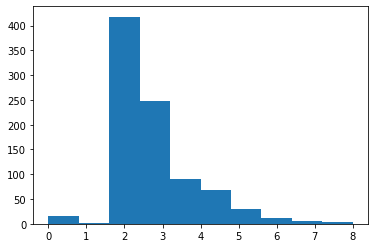

In [40]:
plt.hist(train_data['Fare'])
plt.show()

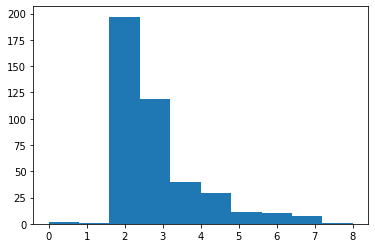

In [41]:
plt.hist(test_data['Fare'])
plt.show()

In [42]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

*** Feature: Embarked ***

In [43]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [44]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

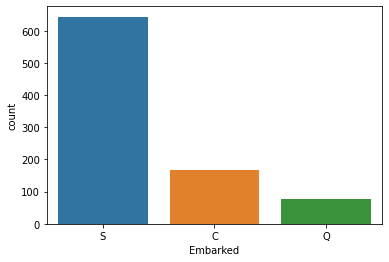

In [45]:
sns.countplot(train_data['Embarked'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

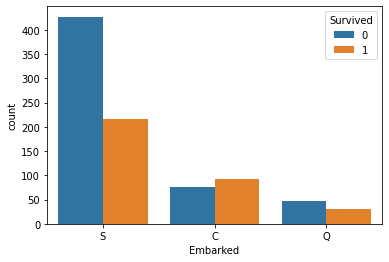

In [46]:
sns.countplot(x = "Embarked", hue = "Survived", data = train_data)

In [47]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode())

# Feature Engineering

In [48]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

In [49]:
train_data.head()

Survived  Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0         0       3  22.0      1      0  1.935438           0         1   
1         1       1  38.0      1      0  4.146318           1         0   
2         1       3  26.0      0      0  1.993730           1         0   
3         1       1  35.0      1      0  3.758647           1         0   
4         0       3  35.0      0      0  2.004158           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

<AxesSubplot:>

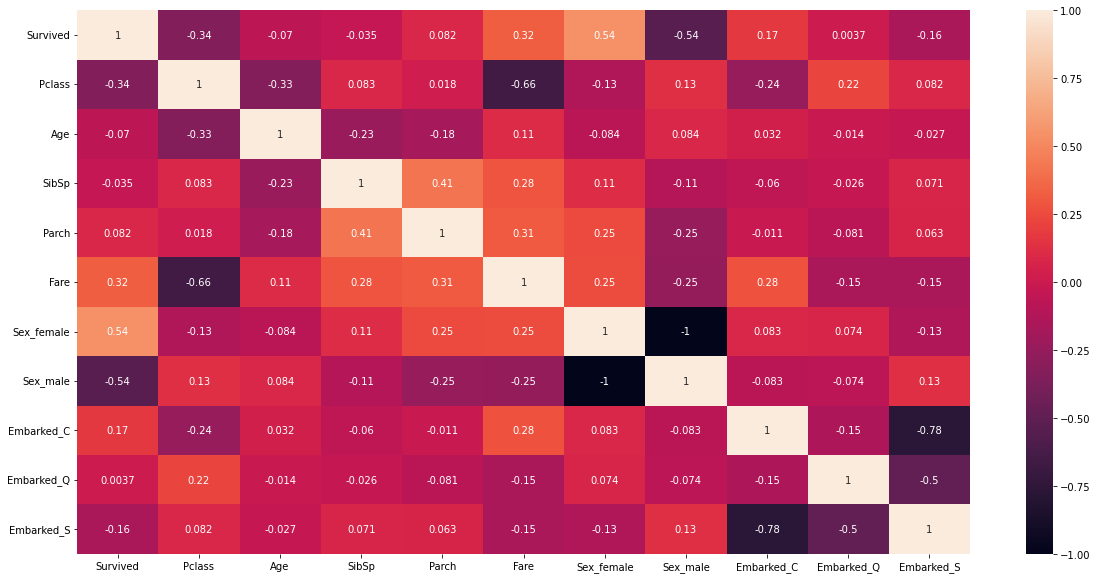

In [50]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.corr(), annot = True)

In [51]:
train_data.drop(['Sex_male', 'Embarked_S'], axis = 1, inplace = True)
test_data.drop(['Sex_male', 'Embarked_S'], axis = 1, inplace = True)

# Model Fitting

In [52]:
X = train_data.drop(['Survived'], axis = 1)
y = train_data['Survived']

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
svm = SVC()
gnb = GaussianNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

def evulate_model(model, X, y):
    cv = cross_val_score(model, X, y, cv = 5)
    print(cv)
    print(cv.mean())

In [54]:
print("Logistic regression")
evulate_model(lr, X, y)

print("SVC")
evulate_model(svm, X, y)

print("GaussianNB")
evulate_model(gnb, X, y)

print("Random forest classifier")
evulate_model(rf, X, y)

print("Decision tree")
evulate_model(dt, X, y)

print("KNN")
evulate_model(knn, X, y)

Logistic regression
[0.78212291 0.78089888 0.7752809  0.76966292 0.82022472]
0.785638064151654
SVC
[0.65363128 0.73595506 0.66292135 0.6741573  0.70224719]
0.6857824367585211
GaussianNB
[0.64804469 0.74157303 0.76404494 0.80337079 0.78651685]
0.7487100621429917
Random forest classifier
[0.7877095  0.80337079 0.83707865 0.78651685 0.8258427 ]
0.8081036971941498
Decision tree
[0.75418994 0.75280899 0.7752809  0.75842697 0.82022472]
0.7721863034335572
KNN
[0.74301676 0.75280899 0.75842697 0.81460674 0.78651685]
0.7710752620676667


In [55]:
train_data

Survived  Pclass        Age  SibSp  Parch      Fare  Sex_female  \
0           0       3  22.000000      1      0  1.935438           0   
1           1       1  38.000000      1      0  4.146318           1   
2           1       3  26.000000      0      0  1.993730           1   
3           1       1  35.000000      1      0  3.758647           1   
4           0       3  35.000000      0      0  2.004158           0   
..        ...     ...        ...    ...    ...       ...         ...   
886         0       2  27.000000      0      0  2.351335           0   
887         1       1  19.000000      0      0  3.107233           1   
888         0       3  29.699118      1      2  2.862294           1   
889         1       1  26.000000      0      0  3.107233           0   
890         0       3  32.000000      0      0  1.978946           0   

     Embarked_C  Embarked_Q  
0             0           0  
1             1           0  
2             0           0  
3             0           0  
4             0           0  
..          ...         ...  
886           0           0  
887           0           0  
888           0           0  
889           1           0  
890           0           1  

[891 rows x 9 columns]

In [56]:
test_data

Pclass       Age  SibSp  Parch      Fare  Sex_female  Embarked_C  \
0         3  34.50000      0      0  1.985664           0           0   
1         3  47.00000      1      0  1.912931           1           0   
2         2  62.00000      0      0  2.131755           0           0   
3         3  27.00000      0      0  2.053751           0           0   
4         3  22.00000      1      1  2.307568           1           0   
..      ...       ...    ...    ...       ...         ...         ...   
413       3  30.27259      0      0  2.004158           0           0   
414       1  39.00000      0      0  4.775395           1           1   
415       3  38.50000      0      0  1.935438           0           0   
416       3  30.27259      0      0  2.004158           0           0   
417       3  30.27259      1      1  2.817169           0           1   

     Embarked_Q  
0             1  
1             0  
2             1  
3             0  
4             0  
..          ...  
413           0  
414           0  
415           0  
416           0  
417           0  

[418 rows x 8 columns]

In [57]:
rf.fit(X, y)

RandomForestClassifier()

In [58]:
from sklearn.model_selection import GridSearchCV 
grid = {
                'n_estimators': [10, 20, 40, 50, 100, 150, 200, 500],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [3, 5, 7, 9, 11, 15],
                'bootstrap': [True, False]
                }
rf = RandomForestClassifier()
rf_random = GridSearchCV(estimator = rf, param_grid = grid, cv = 3, verbose=2, n_jobs = -1)
rf_random.fit(X, y)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=20; total time=   0.0s
[CV] 

[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_est

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 5, 7, 9, 11, 15],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20, 40, 50, 100, 150, 200, 500]},
             verbose=2)

In [59]:
rf_random.score(X, y)

0.9259259259259259

In [60]:
pred = rf_random.predict(test_data)

In [61]:
submission['Survived'] = pred

In [62]:
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [63]:
submission = submission.set_index('PassengerId')

In [64]:
submission.head()

Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1

In [65]:
submission.to_csv("submission.csv")